### Previously we filtered galaxies which we can't use due to it not being available in the MaNGA sample, or because it didn't have a spiral classification.

Now we will filter out sample further, since we know that a threshold of $T_{sp} = T_{nsp} = 3$ works best for us. We'll do this the same way we did in `filter_usable_galaxies.ipynb`. 

In [1]:
import numpy as np
import pandas as pd
import sys

#we'll import the gz3d_fits module now
sys.path.insert(0, '../../GZ3D_production/')
import gz3d_fits

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
available_spiral_paths = np.load('available_spirals.npy', allow_pickle=True)

In [3]:
#this function will now tell us the percentage of pixels identified as a spiral arm in the spiral galaxy by at least one person.
#we'll find that for some galaxies, this is 0! We can filter those out.

def get_pc_spiral_pixels(path):
    data = gz3d_fits.gz3d_fits(path)
    
    image_spiral_mask = data.spiral_mask
    pixels_above_threshold = (image_spiral_mask > 3).sum()
    
    return (pixels_above_threshold * 100) / image_spiral_mask.size

In [4]:
#we'll now form a list of dictionaries, each containing some information (the filepath and MaNGA ID) for
#the galaxy. We'll also calculate what percent of pixels in the galaxy's image have been classified as spiral arms.
#This will help us drop galaxies with no classifications.
galdict_array = []
count = 0

for path in available_spiral_paths:
    mangaid = path.split('/')[-1].split('_')[0]
    percent  = get_pc_spiral_pixels(path)
    
    galdict = {
        'filepath': path,
        'mangaid': mangaid,
        'pc_spiral_pixels': percent
    }
    
    count += 1 #this is just to keep track of processing
    print(count)
    
    galdict_array.append(galdict)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
df = pd.DataFrame.from_dict(galdict_array)

In [6]:
df

,filepath,mangaid,pc_spiral_pixels
0,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-26306,0.262676
1,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-178542,1.232834
2,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-91339,1.839456
3,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-51315,1.453061
4,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-94066,9.491156
...,...,...,...
2291,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-2604,2.522630
2292,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-71763,0.000000
2293,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-548639,0.810159
2294,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-352635,4.374422


In [8]:
df[df.pc_spiral_pixels > 1.5]

,filepath,mangaid,pc_spiral_pixels
2,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-91339,1.839456
4,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-94066,9.491156
5,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-145679,2.699683
6,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-210667,2.753016
7,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-117115,6.388390
...,...,...,...
2289,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-603974,2.803810
2290,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-176187,2.675374
2291,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-2604,2.522630
2294,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-352635,4.374422


In [12]:
gals_1pc = df[(df.pc_spiral_pixels <1.5)]

In [21]:
gals_1pc = gals_1pc.filepath.to_numpy()

In [23]:
from marvin.tools.maps import Maps

[WARNING]: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). (RuntimeWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


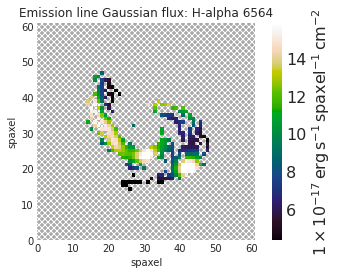

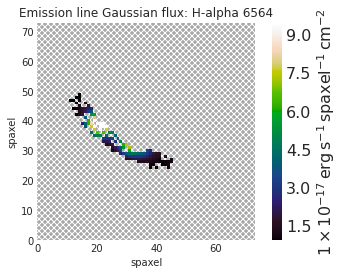

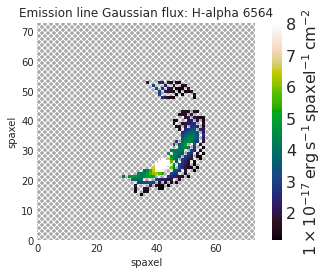

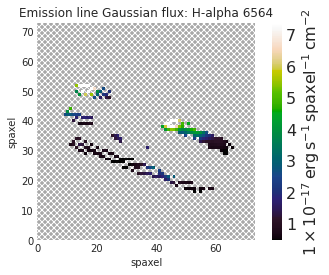

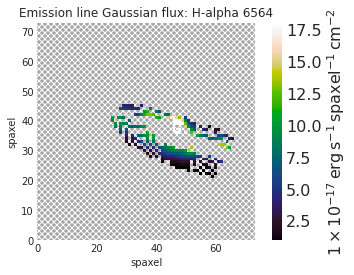

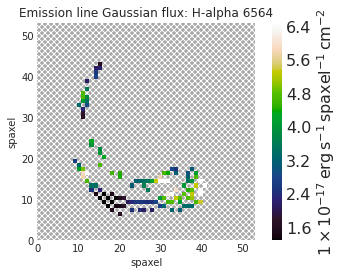

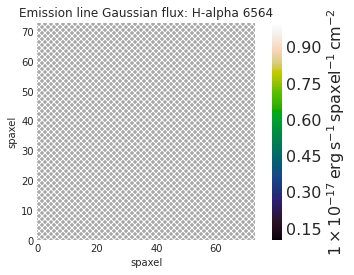

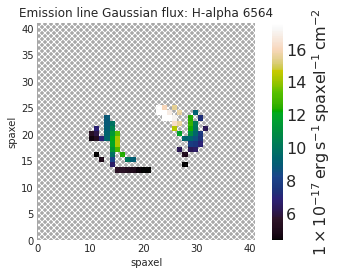

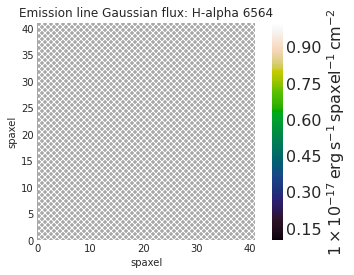

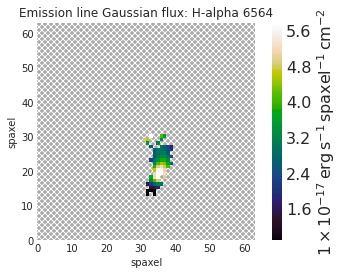

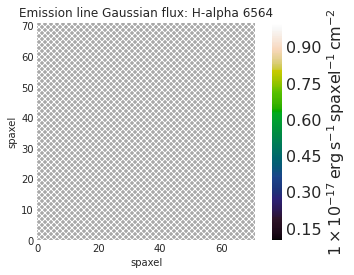

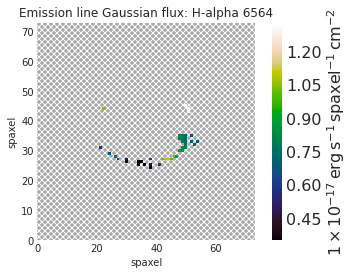

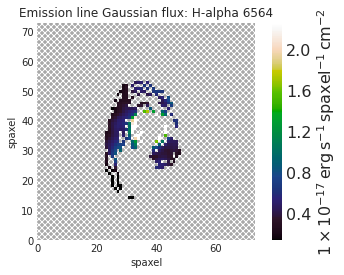

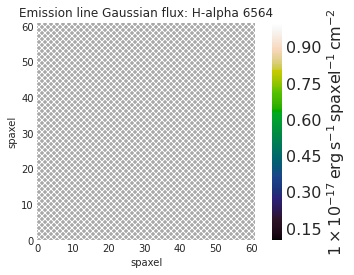

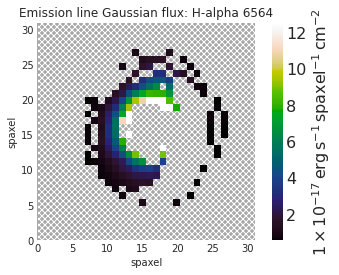

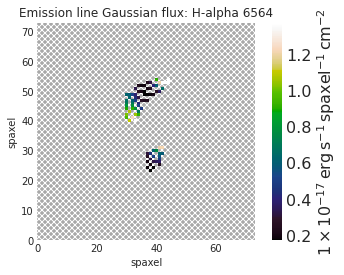

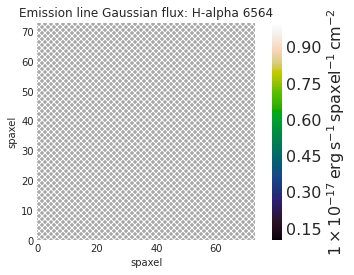

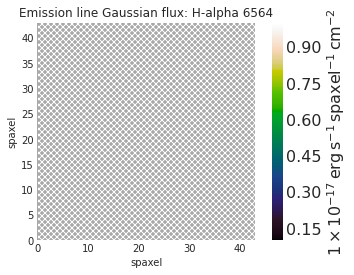

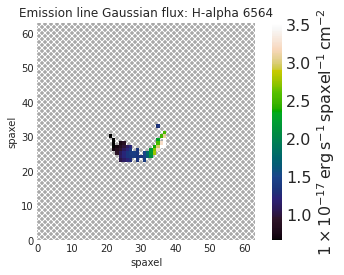

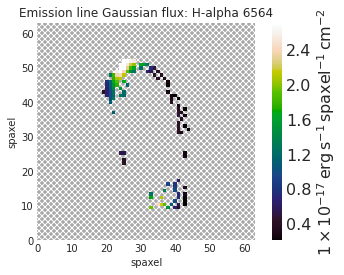

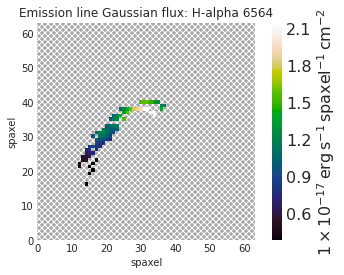

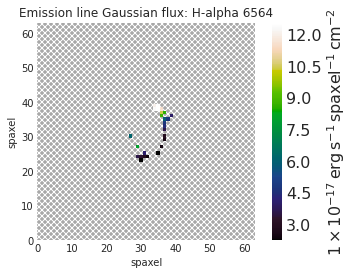

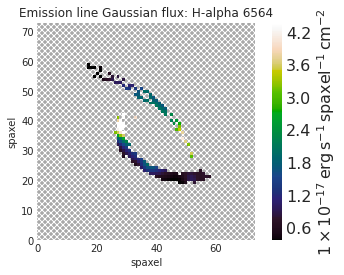

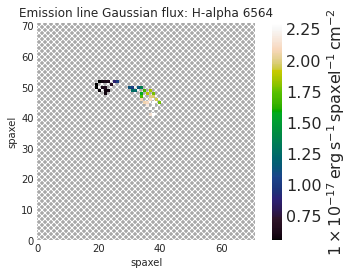

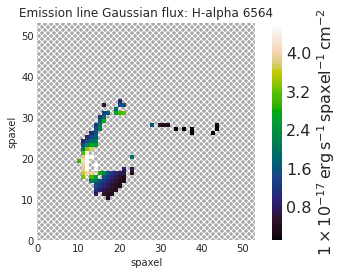

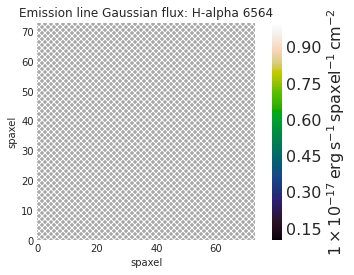

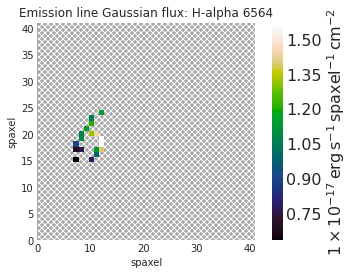

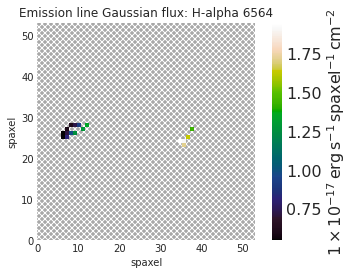

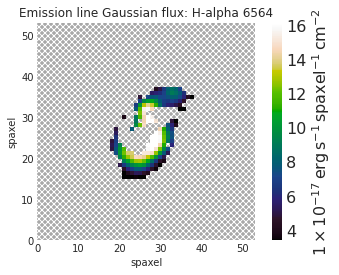

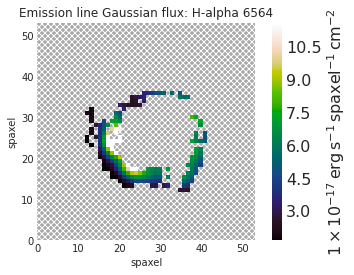

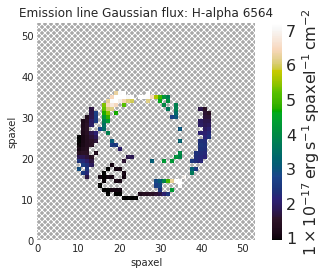

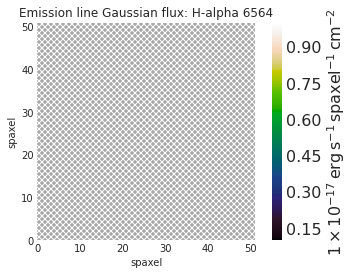

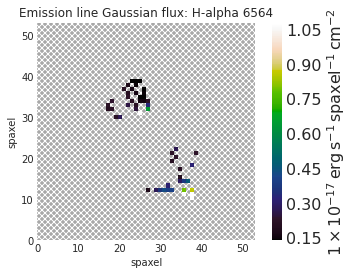

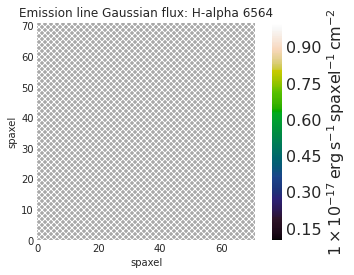

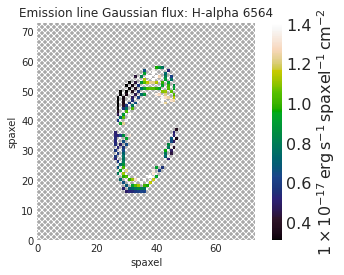

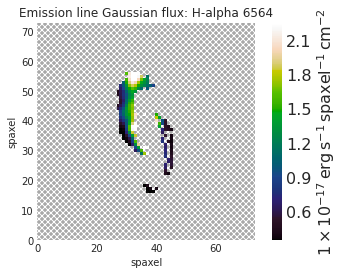

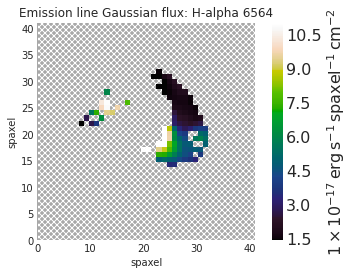

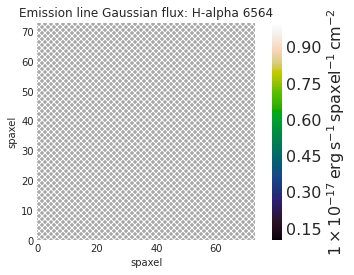

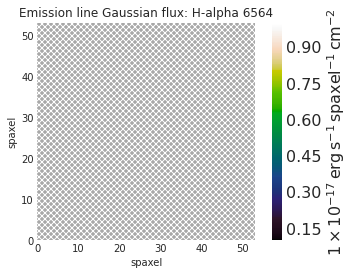

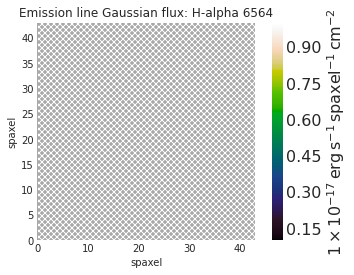

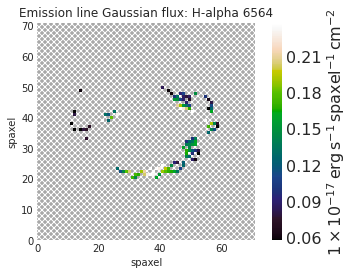

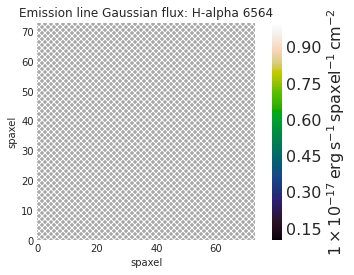

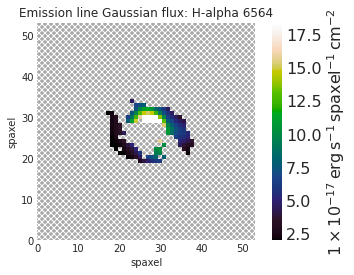

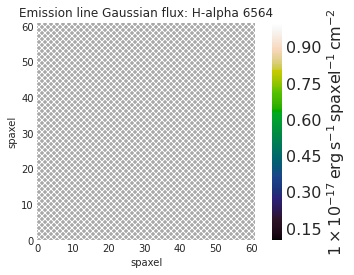

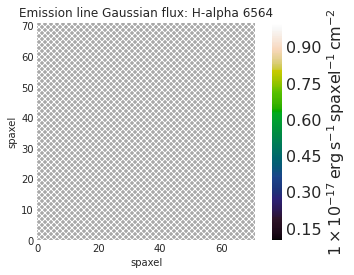

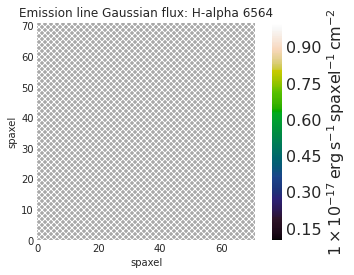

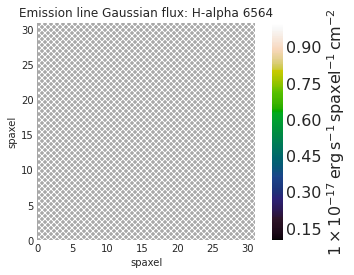

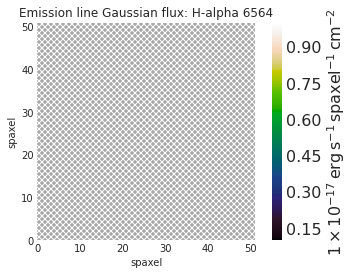

In [46]:
for path in gals_1pc[2:50]:
    mangaid = path.split('/')[-1].split('_')[0]
    maps = Maps(mangaid)
    hamap = maps.emline_gflux_ha_6564
    
    data = gz3d_fits.gz3d_fits(path)
    data.make_all_spaxel_masks(grid_size=hamap.shape)
    
    spiral = ~(data.spiral_mask_spaxel > 3) * 2**30
    mask = hamap.mask | spiral
    
    hamap.plot(mask=mask)

In [29]:
maps = Maps(gals_1pc[5].split('/')[-1].split('_')[0])

In [39]:
maps.emline_gflux_ha_6564.mask

array([[1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       ...,
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840],
       [1073741840, 1073741840, 1073741840, ..., 1073741840, 1073741840,
        1073741840]], dtype=int32)